In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [60]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [61]:
import matplotlib.pyplot as plt

In [62]:
x_train.shape # training data consists 60000 image with 28x28 pixels

(60000, 28, 28)

In [63]:
single_image = x_train[0]

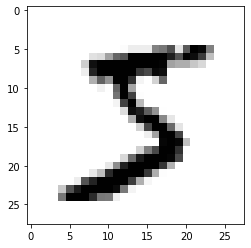

In [64]:
plt.imshow(single_image,cmap='gray_r') # gray_r to reverse color 

In [65]:
# Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

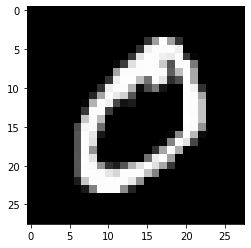

In [66]:
plt.imshow(x_train[1], cmap='gray')

# We need to apply one-hot-encoding convert because this is something neural networks understand and good for sigmoid function for activation in output layer

In [67]:
from tensorflow.keras.utils import to_categorical

In [68]:
# One-hot-encoding convert for both testt and training labels
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [69]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [71]:
single_image.max()

255

# We have to normalize the image to be between 0 and 1

In [72]:
# without sklearn
x_train = x_train / x_train.max() #  divided by 255

In [73]:
x_test = x_test / x_test.max() 

In [74]:
# plt.imshow(x_train[0], cmap='gray_r')

# Make it general by reshape it

In [75]:
x_train = x_train.reshape(60000,28,28,1)

In [76]:
x_train.shape

(60000, 28, 28, 1)

In [77]:
# do the same with x_test
x_test.shape

(10000, 28, 28)

In [78]:
x_test = x_test.reshape(10000,28,28,1)

In [79]:
# WE HAVE UNDERSTOOD THE DATA AND VISUALIZE
# NOW IT'S TIME TO BUILD AND TRAIN OUR MODEL

In [80]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [81]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation='relu' )) # up number of filters for advance image

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN the one-hot-encoding from 2d to --> 1d
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation='relu'))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

# DONT FORGET TO COMPILE
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [82]:
# Summarize model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


# Fit the data : TRAIN OUR DATA WITH OUR MODEL

In [87]:
model.fit(x_train,y_cat_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 36s 599us/sample - loss: 0.0252 - accuracy: 0.9929
Epoch 2/2
60000/60000 [==============================] - 38s 633us/sample - loss: 0.0196 - accuracy: 0.9943


In [84]:
model.metrics_names

['loss', 'accuracy']

In [89]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.0459 - accuracy: 0.9889


[0.045937658535446284, 0.9889]

In [90]:
# predict classes from image the model hasnt been seen before

In [91]:
from sklearn.metrics import classification_report

In [92]:
predictions = model.predict_classes(x_test)

### If we print predictions, it will show the data in NON one-hot-encoding , therefore when we wanted to do classification_report between the label test to the predictions , then we use the NON ONE-HOT-ENCODING either

In [93]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [94]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

